In [24]:
# Data handling and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing and data transformation
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

# Model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

In [25]:
# Read the CSV file into a DataFrame

df_train = pd.read_csv('train.csv')

In [26]:
# Display the first few rows of the DataFrame

df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 2. Data set analysis

To help understanding the structure and characteristics of the dataset


In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [28]:
df_train.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [29]:
df_train.shape

(1460, 81)

# 3. Split Data

In [30]:
# Separate the features and the target variable
X = df_train.drop('SalePrice', axis=1)  # Features (all columns except 'SalePrice')
y = df_train['SalePrice']               # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1998
)

# 4. Drop the unwanted columns

In [31]:
# Checking the percentage of missing value on each columns

missing_values = X_train.isnull().sum()

missing_values = missing_values[missing_values > 0]

missing_percentage = (missing_values / len(X_train)) * 100

missing_percentage

LotFrontage     16.866438
Alley           93.835616
MasVnrType      59.760274
MasVnrArea       0.684932
BsmtQual         2.568493
BsmtCond         2.568493
BsmtExposure     2.654110
BsmtFinType1     2.568493
BsmtFinType2     2.654110
Electrical       0.085616
FireplaceQu     47.174658
GarageType       4.794521
GarageYrBlt      4.794521
GarageFinish     4.794521
GarageQual       4.794521
GarageCond       4.794521
PoolQC          99.571918
Fence           80.222603
MiscFeature     95.976027
dtype: float64

In [12]:
# Checking columns that have many missing data

columns_to_drop = missing_percentage[missing_percentage > 30].index

X_train.drop(columns = columns_to_drop, inplace= True)

print(X_train)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
768    769          20       RL         70.0     9100   Pave      Reg   
1102  1103          20       RL         70.0     7000   Pave      Reg   
816    817          20       RL          NaN    11425   Pave      IR1   
391    392          60       RL         71.0    12209   Pave      IR1   
747    748          70       RM         65.0    11700   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
224    225          20       RL        103.0    13472   Pave      Reg   
1188  1189          60       RL         68.0     8935   Pave      IR1   
897    898          90       RL         64.0     7018   Pave      Reg   
673    674          20       RL        110.0    14442   Pave      Reg   
840    841          70       RH          NaN    12155   Pave      IR1   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
768          Lvl    AllPub    Inside  ... 

In [13]:
#Checking the columns we need to fill in

columns_to_fill = missing_percentage[missing_percentage < 30].index
columns_to_fill

Index(['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [14]:
#Filling the missing values with the mean of the column if the column is float or integer and with the mode if it´s a object.


for column in columns_to_fill:
    if X_train[column].dtype == "float64" or X_train[column].dtype == "int64":
        X_train[column].fillna(X_train[column].mean(), inplace=True)
    else:

        X_train[column].fillna(X_train[column].mode()[0], inplace=True)
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
#Confirming that we removed all the missing values from the data set
X_train.isnull().sum().sum()

0

In [16]:
#We don´t really need the id column so we drop it.
X_train.drop(columns=['Id'], inplace=True)

In [17]:
#Spliting the data between numerical and categorical variables and storing them in a list.
num_data = X_train.select_dtypes(include=np.number).columns.tolist()
cat_data = X_train.select_dtypes(exclude=np.number).columns.tolist()

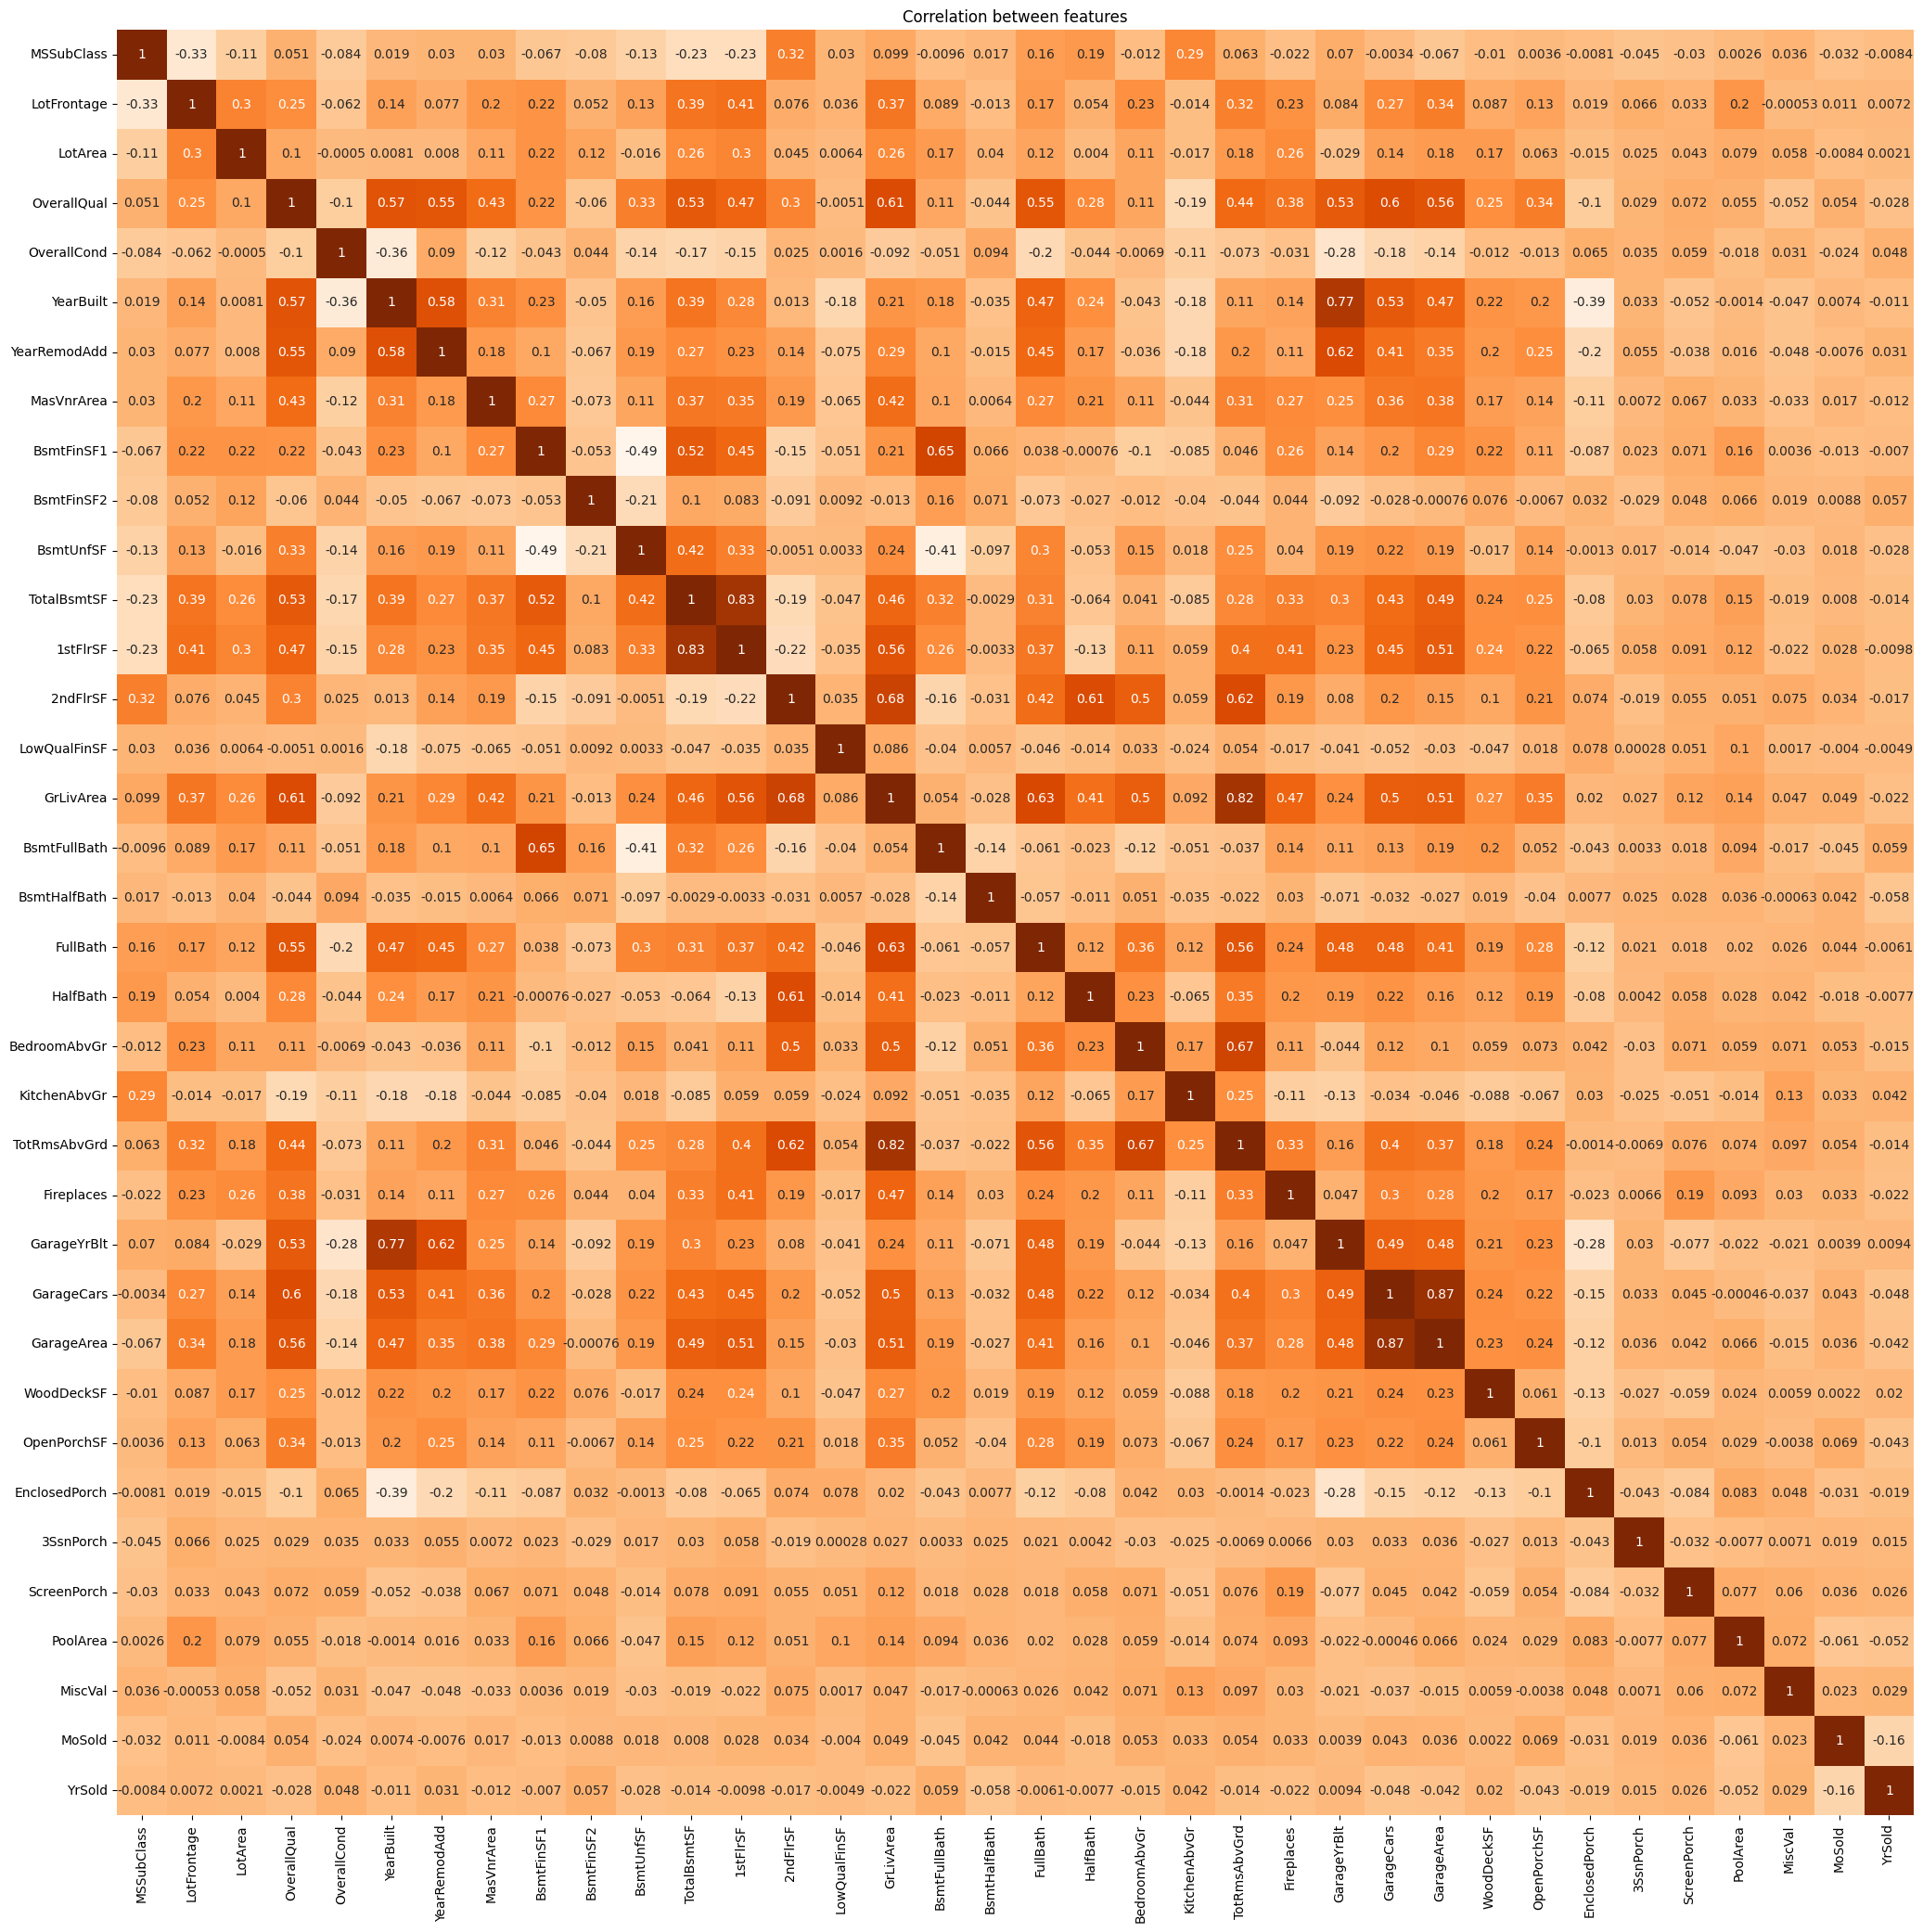

In [18]:
#Checking for correlation between the numerical variables

corr = X_train[num_data].corr()
plt.subplots(1,1, figsize=(25,25))
sns.heatmap(data=corr, cmap ='Oranges', annot = corr, cbar=None)
plt.title('Correlation between features')
plt.show()

In [19]:
#Checking for high correlation between features

# Step 1: Identify pairs of features with a correlation greater than 0.6

threshold = 0.6
high_corr_pairs = set()

# Iterate over the correlation matrix
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            colname_i = corr.columns[i]
            colname_j = corr.columns[j]
            high_corr_pairs.add((colname_i, colname_j))

# Print the highly correlated pairs
print("Highly correlated pairs (greater than 0.6):")
print(high_corr_pairs)

# Step 2: Determine which feature to remove
# Here, we'll arbitrarily remove the second feature in each pair (you can customize this logic)

features_to_remove = set()
for (feature1, feature2) in high_corr_pairs:
    features_to_remove.add(feature2)

# Print the features to remove
print("Features to remove:")
print(features_to_remove)

# Step 3: Drop the identified features from the DataFrame
X_train_reduced = X_train.drop(columns=list(features_to_remove))

# Print the shape of the DataFrame before and after
print("Shape before:", X_train.shape)
print("Shape after:", X_train_reduced.shape)

Highly correlated pairs (greater than 0.6):
{('GarageYrBlt', 'YearBuilt'), ('BsmtFullBath', 'BsmtFinSF1'), ('HalfBath', '2ndFlrSF'), ('TotRmsAbvGrd', '2ndFlrSF'), ('GrLivArea', 'OverallQual'), ('FullBath', 'GrLivArea'), ('GrLivArea', '2ndFlrSF'), ('TotRmsAbvGrd', 'GrLivArea'), ('GarageArea', 'GarageCars'), ('TotRmsAbvGrd', 'BedroomAbvGr'), ('1stFlrSF', 'TotalBsmtSF'), ('GarageYrBlt', 'YearRemodAdd')}
Features to remove:
{'YearBuilt', 'TotalBsmtSF', 'BsmtFinSF1', 'GrLivArea', 'OverallQual', '2ndFlrSF', 'BedroomAbvGr', 'YearRemodAdd', 'GarageCars'}
Shape before: (1168, 73)
Shape after: (1168, 64)


# 5. Outliers EDA

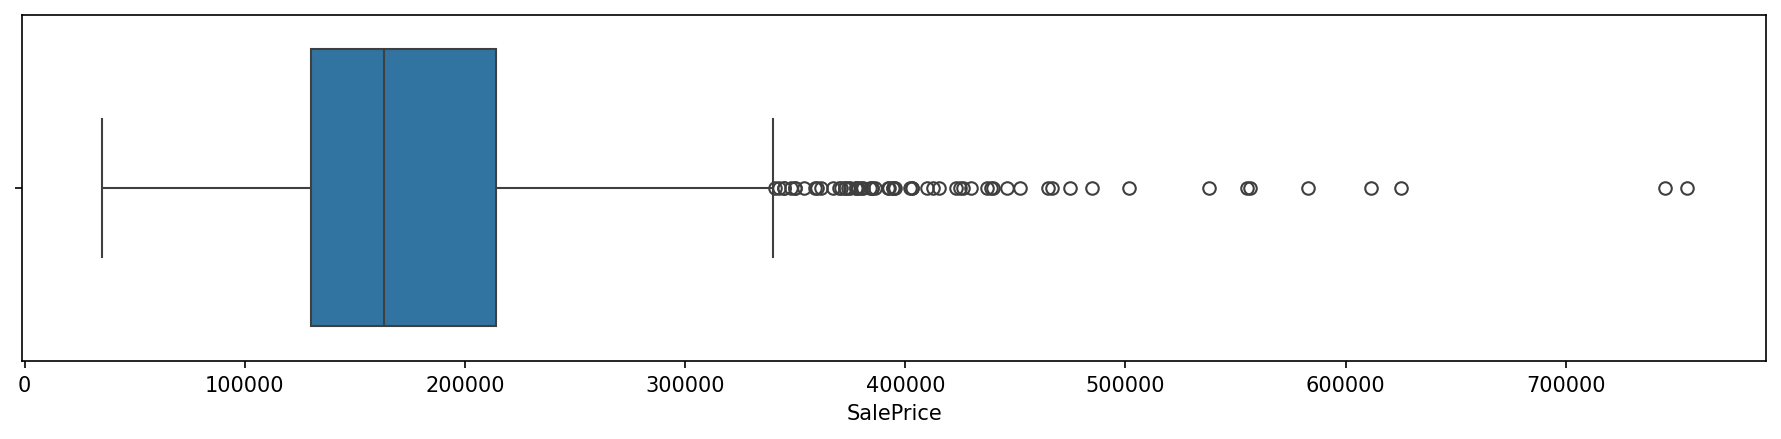

In [20]:
# Set up the figure size and DPI
plt.figure(figsize=(15, 3), dpi=150)

# Create the boxplot
sns.boxplot(x=y)

# Set the plot orientation
plt.xlabel('SalePrice')

# Show the plot
plt.show()

In [21]:
# Calculate Q1 and Q3
q1 = y.quantile(0.25)
q3 = y.quantile(0.75)

# Calculate the Interquartile Range (IQR)
iqr = q3 - q1

# Define the upper boundary for outliers
upper_boundary = q3 + 1.5 * iqr

print(f"Q1: {q1}")
print(f"Q3: {q3}")
print(f"IQR: {iqr}")
print(f"Upper boundary for outliers: {upper_boundary}")

Q1: 129975.0
Q3: 214000.0
IQR: 84025.0
Upper boundary for outliers: 340037.5


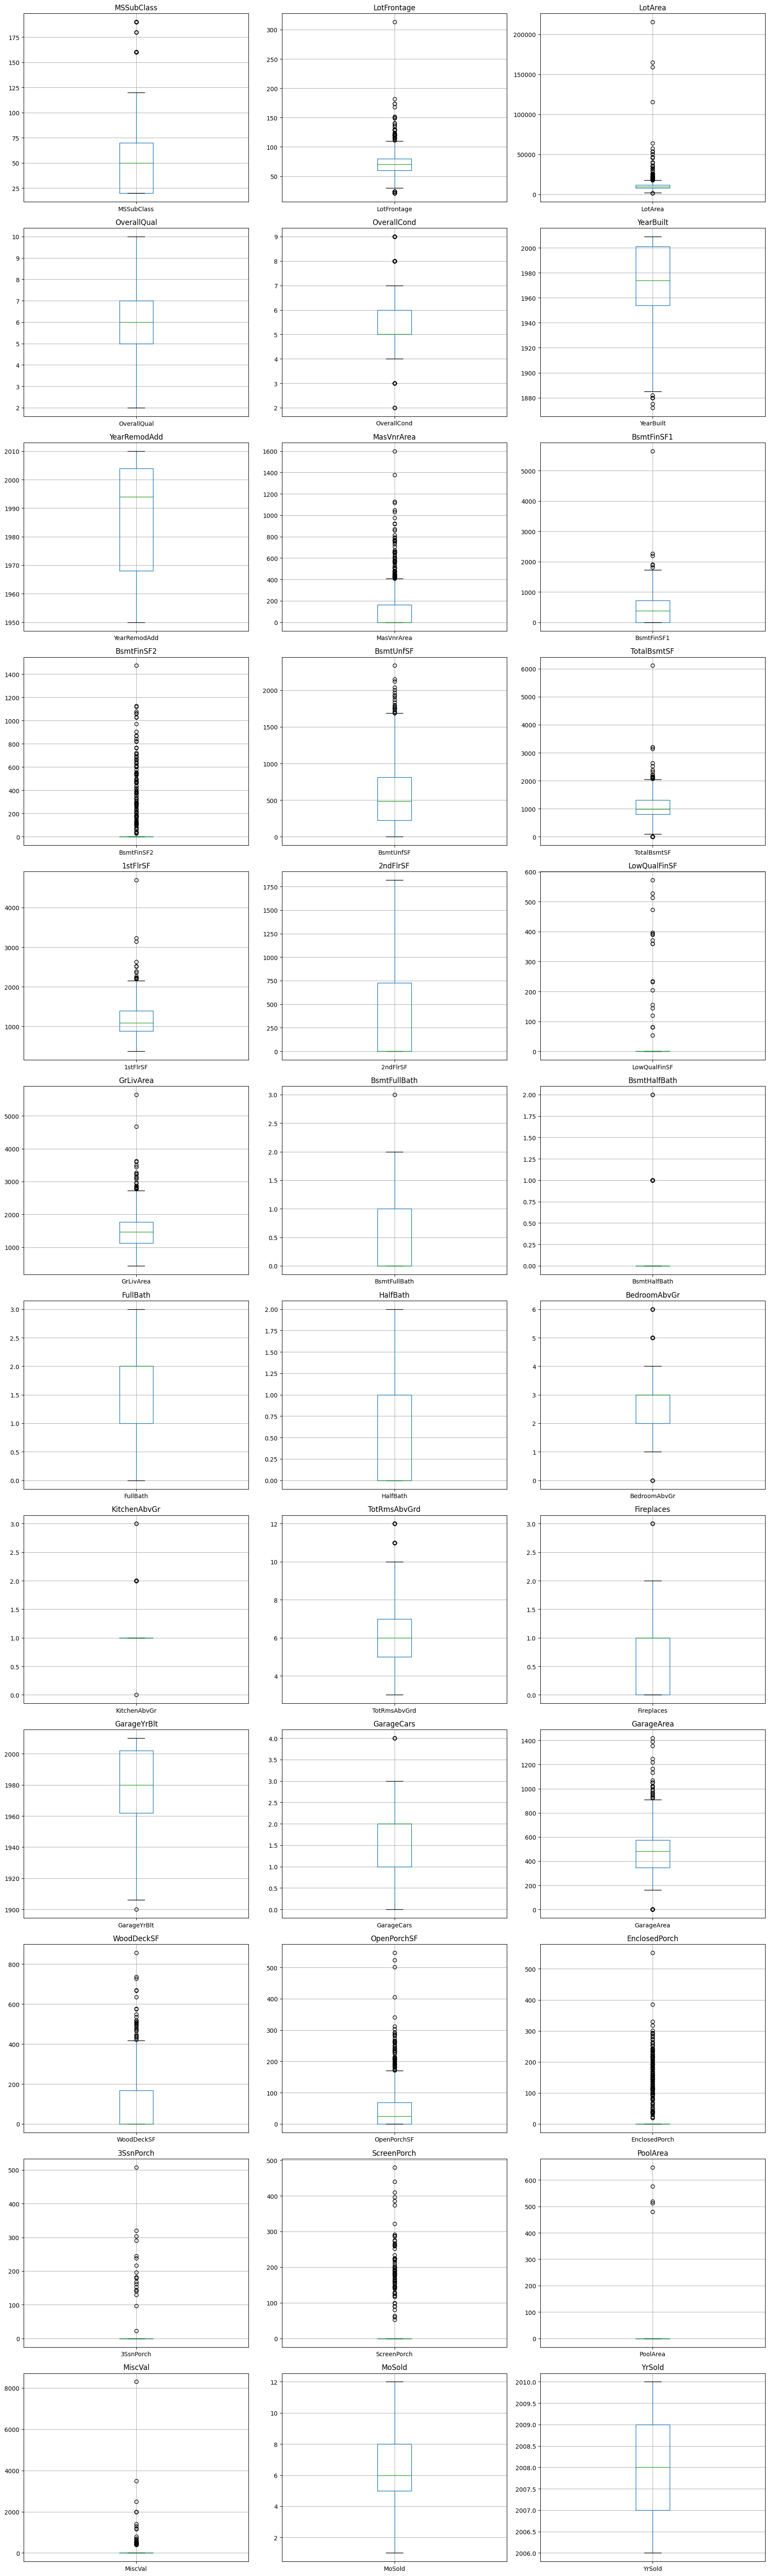

In [36]:
# Number of features to plot
n_features = len(num_data)

# Number of columns per row
n_cols = 3

# Calculate the number of rows needed
n_rows = np.ceil(n_features / n_cols).astype(int)

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the boxplots
for i, feature in enumerate(num_data):
    X_train[[feature]].boxplot(ax=axes[i])
    axes[i].set_title(feature)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 6. Pipeline


In [22]:
#Creating pipelines for numerical and categorical data.

num_pipe = make_pipeline(SimpleImputer(strategy='mean'),MinMaxScaler())
cat_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'),
                         OneHotEncoder(handle_unknown='ignore'))

preprocessor= ColumnTransformer([
    ('num_pipe',num_pipe,num_data),
    ('cat_pipe',cat_pipe,cat_data)
])

preprocessor

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['MSSubClass', 'LotFrontage', 'LotArea',
                                  'OverallQual', 'OverallCond', 'YearBuilt',
                                  'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                  'GrLivArea', 'BsmtFullBath',...
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'Neighborhood', 'Condition1',
                                  'Condition2', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'Exterior2nd', 'ExterQual', 'ExterCond',
                                  'Foundation', 'BsmtQual', 'BsmtCond',
                                  'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Heating', 'HeatingQC',
                                  'CentralAir', 'Electrical', 'KitchenQual',
                                  'Functional', ...])])

# 7. Modeling

In [37]:
def prediction(model):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(f"{model}")
    print(f"RMSE is {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"MAE is {mean_absolute_error(y_test, y_pred)}")
    print(f"R2 is {r2_score(y_test, y_pred)}")

In [38]:
prediction(LinearRegression())

LinearRegression()
RMSE is 29324.95843916193
MAE is 17367.133304185954
R2 is 0.8796597207010117


In [39]:
prediction(DecisionTreeRegressor(random_state=1998))

DecisionTreeRegressor(random_state=1998)
RMSE is 46081.30474331093
MAE is 26910.38698630137
R2 is 0.7028431548415925


In [40]:
prediction(RandomForestRegressor(n_estimators=100, random_state=1998,n_jobs=-1))

RandomForestRegressor(n_jobs=-1, random_state=1998)
RMSE is 34340.56874109268
MAE is 18627.812123287673
R2 is 0.8349744565167293


In [41]:
prediction(GradientBoostingRegressor(random_state=1998))

GradientBoostingRegressor(random_state=1998)
RMSE is 33407.18371139151
MAE is 17468.250263026428
R2 is 0.8438234103150065


In [42]:
prediction(RidgeCV())

RidgeCV()
RMSE is 34931.742418323105
MAE is 18842.051062200564
R2 is 0.8292437130196758


In [43]:
prediction(ElasticNetCV())

ElasticNetCV()
RMSE is 81389.6571106797
MAE is 54516.0082655206
R2 is 0.07301086865253459


In [44]:
prediction(LassoCV())

LassoCV()
RMSE is 31403.44225420669
MAE is 17602.16913920662
R2 is 0.861996304774016


In [45]:
best_model = GradientBoostingRegressor(random_state=1998)
prediction(best_model)

GradientBoostingRegressor(random_state=1998)
RMSE is 33407.18371139151
MAE is 17468.250263026428
R2 is 0.8438234103150065


In [46]:
best_model = LinearRegression()

prediction(best_model)

LinearRegression()
RMSE is 29324.95843916193
MAE is 17367.133304185954
R2 is 0.8796597207010117


# Test submission

In [47]:
df_test = pd.read_csv('test.csv')

In [48]:
id = df_test['Id'].copy()

df_test = df_test.drop('Id', axis=1)

test_preprocessed = preprocessor.transform(df_test)

predictions = best_model.predict(test_preprocessed)

predictions_df = pd.DataFrame({
    'Id': id,
    'SalePrice': predictions
})

In [49]:
predictions_df

,Id,SalePrice
0,1461,111622.607114
1,1462,175653.275440
2,1463,186816.656597
3,1464,202797.032997
4,1465,207683.359409
...,...,...
1454,2915,67667.309389
1455,2916,75029.899769
1456,2917,179955.736135
1457,2918,100881.158929
